In [1]:
from astropy.wcs import *

In [2]:
import astropy
#from astropy.coordinates.


In [83]:
import numpy as np
from numpy.random import randint as rand

import matplotlib as mpl
import requests
import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
import random

from classes import GCNEvent, User, get_constellation

from astropy.coordinates import SkyCoord, get_body 
from astropy.time import Time 

In [4]:
# set this to True if you want to debug and only use a few of the events! 
debug = True

#The function that does the magic
#  (easy to modify to also get energy, signalness, whatever if you like)
def GetLonsAndLats(url):
    r = requests.get(url, allow_redirects=True)
    lines=r.text.split("\n")
    events = []

    count = 0
    for l in lines:
        if count>=20 and debug:
            break
        if("href=notices_amon" in l):
            count +=1 
            try:
                url="https://gcn.gsfc.nasa.gov/"+l.split("=")[-1].split(">")[0]
                print(url)
                r = str(requests.get(url, allow_redirects=True).content)
                request_full = r.split("\\n")
                event = GCNEvent(request_full) # everything you should need!
                #print(coords)
                events.append(event)
            except:
                print("Skipping")
    return events

In [112]:
# Pick an event type!
icecube_astrotracks_url='https://gcn.gsfc.nasa.gov/amon_icecube_gold_bronze_events.html'
icecube_ehe_url='https://gcn.gsfc.nasa.gov/amon_ehe_events.html'
icecube_hese_url='https://gcn.gsfc.nasa.gov/amon_hese_events.html'

# And get the ecliptic coordinates like this 
#  (you can click any of the URLs to see full report)
events=GetLonsAndLats(icecube_astrotracks_url)



https://gcn.gsfc.nasa.gov/notices_amon_g_b/135553_7213992.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135553_7213992.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135440_3139778.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135440_3139778.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135363_69917294.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135363_69917294.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135302_36915486.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135292_56063172.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135292_56063172.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135270_69188496.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/135113_19489408.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134994_1103075.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134979_17138286.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134979_17138286.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/134818_73718836.amon
https://gcn.gsfc.nasa.gov/notices_amon_g_b/13

Text(0, 0.5, 'Ecliptic Latitutde')

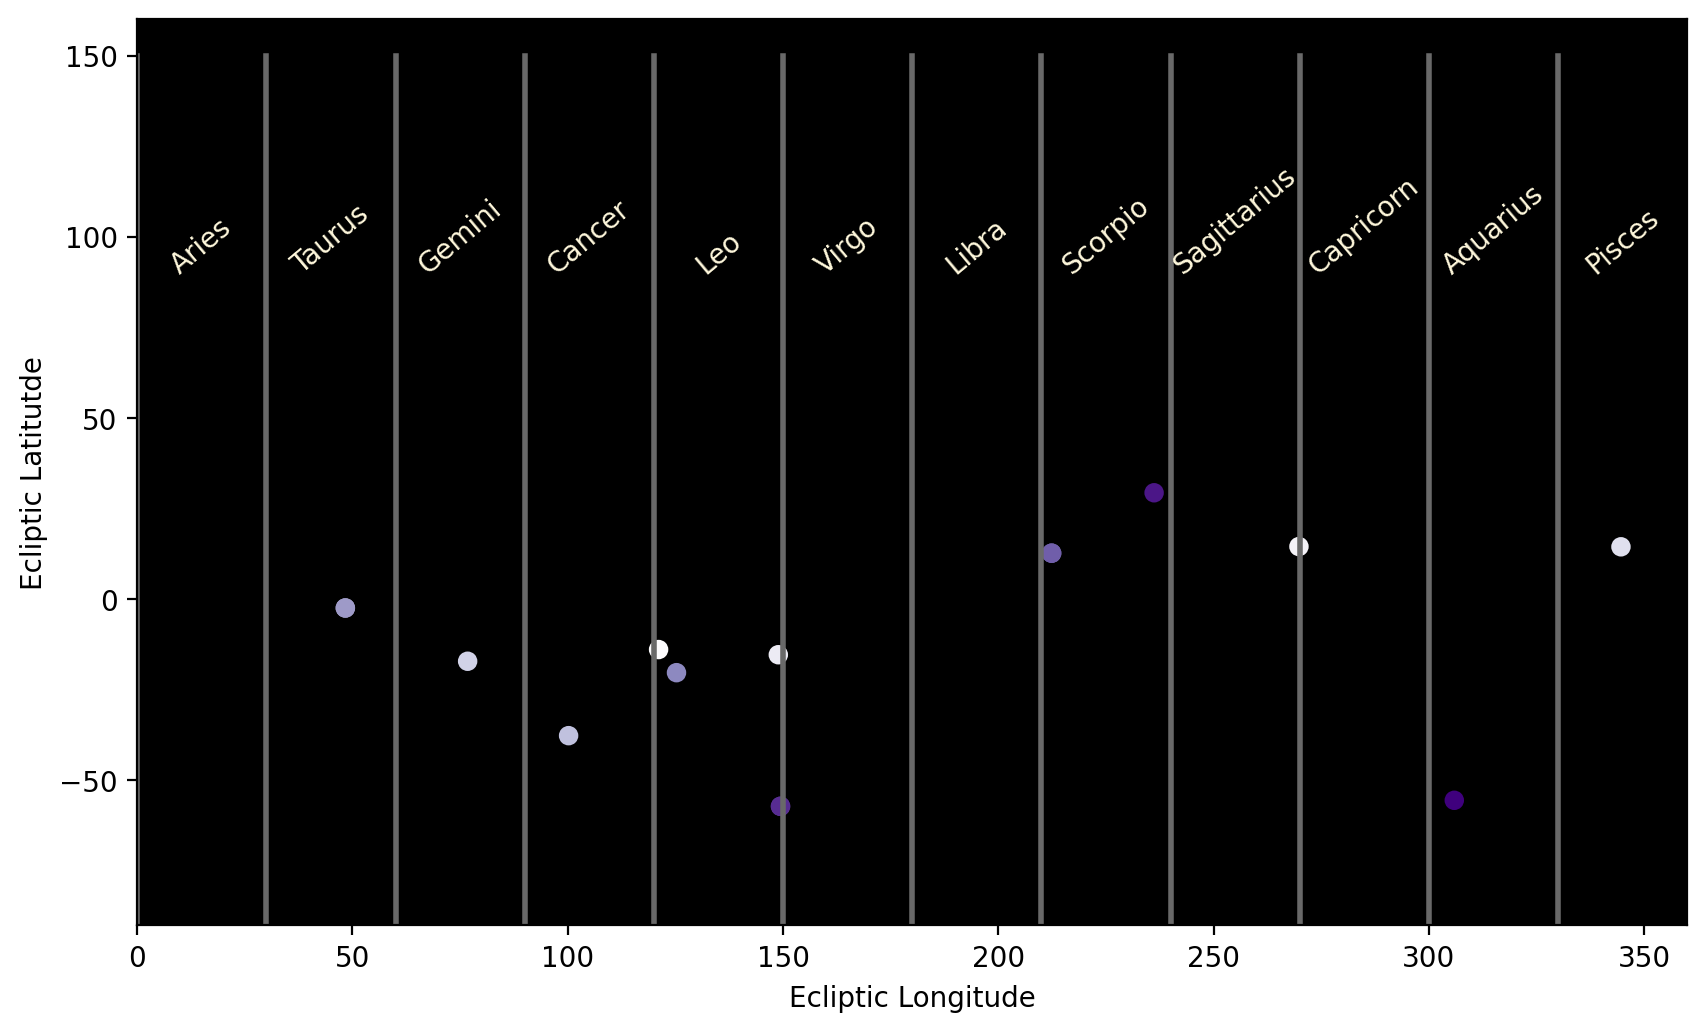

In [113]:

Zodiacs=['Aries','Taurus','Gemini','Cancer','Leo','Virgo','Libra','Scorpio','Sagittarius','Capricorn','Aquarius','Pisces']
plt.figure(figsize=(10,6),dpi=200)
ax=plt.gca()
ax.set_facecolor("black")
col=np.arange(len(lats))
plt.scatter(lons,lats,c=col,cmap=cm.Purples)
for i in range(0,12):
    plt.plot([i*30,i*30],[-90,150],'-',color='dimgrey',linewidth=2)
    plt.text(30*i+15,90,Zodiacs[i],ha='center',color='cornsilk',rotation=40)
plt.xlim(0,360)
plt.ylim(-90,160)
plt.xlabel("Ecliptic Longitude")
plt.ylabel("Ecliptic Latitutde")


In [120]:
fake_user_1 = User("John Doe, place@domain.com, 02/19/1991, 36.6, -99.1")
fake_user_2 = User("Jane Moose, web@site.com, 04/01/1982, 23.6, -19.1")

options = ["Good", "Okay", "Bad"]

# see "events" from cell 5 if you want some debug events 


def make_horoscope( user_obj, event):
    if not isinstance(user_obj, User):
        raise TypeError("Expected {}, got {}".format(User, type(user_obj)))
    if not isinstance(event, GCNEvent):
        raise TypeError("Expected {}, got {}".format(GCNEvent, type(event)))

    # We make three lists of statements:
    # 1. DefiniteStatements: A list of statements we will definitely make, 
    # 2. OptionalStatements: A list we can randomly pick from to fill out the horoscope
    OptionalStatements=[]
    DefiniteStatements=[]
    
    ZodiacSign=Zodiacs[int(event.lon/30)]


    # Make a statement based on event type
    if ('HESE' in event.r_dict['NOTICE_TYPE'].upper()):
        EventTypeStr='high energy starting event'
        EventTypeStatement=random.choice([
            "High energy starting events (HESE) are special events which deposit all their energy within the IceCube detector.  This allows the IceCube collaboration to measure their charge with great precision. Consider drawing inspiration from this HESE event and engaging in some inner introspection today.",
            "High energy starting events (HESE) are events that start inside the IceCube detector. This allows the scientists at IceCube to be sure they were not caused by external noise, but by neutrinos interacting in the ice. Consider drawing inspiration from this HESE event and shutting out external influences for a while to find inner peace.",
            "High energy starting events (HESE) were the first discovered astrophysical neutrino events, observed by IceCube in 2013. Consider taking some time to discover something new about yourself today."])
    elif ('EHE' in event.r_dict['NOTICE_TYPE'].upper()):
        EventTypeStr='extremely high energy event'
        EventTypeStatement=random.choice([
            "Extreme high energy (EHE) events are the highest energy events observed by IceCube.  Take inspiration from this EHE event and drive toward your goals this week.",
            "Extreme high energy (EHE) events deposit their energy inside IceCube but often have so much that it spills outside the array and into the glacier beyond.  Take inspiration from this EHE event and break through a barrier today.",
            "Extreme high energy (EHE) events are produced by the most energetic neutrinos observed by IceCube. Many have have escaped from the pull of black holes in distant active galactic nuclei. If these neutrinos can escape from the extreme gravity that tried to hold them back, you can free yourself from your difficulties today."])
    elif ('TRACK' in event.r_dict['NOTICE_TYPE'].upper()):
        EventTypeStatement=random.choice([
            "Astrotrack events are caused by muons created by neutrino interactions in the South Pole ice. They point back to their sources with great precision.  Take inspiration from this astrotrack event and seek to understand where you came from and where you are going, today.",
            "Astrotrack events are the most precisely localized neutrino events and allow scientists at IceCube to observe distant point sources of neutrinos that are billions of light years away.  Take inspiration from this astrotrack event and use the tools you have in hand to find your direction today. ",
            "Astrotrack events are caused by muons that draw a straight line of light through the antarctic glacial ice, pointing back to their distant astrophysical sources.  Consider seeking a lit path to follow toward your destination, however distant it may feel."])
        EventTypeStr='neutrino track event'

    DefiniteStatements.append("The IceCube Neutrino Telescope has detected a "+EventTypeStr+ " that was likely induced by a high energy astrophysical neutrino produced in a distant galaxy, interacting in the glacial ice of the South Pole.")
    
    DefiniteStatements.append("\n")
    DefiniteStatements.append("The event came from the direction of the zodiac sign "+ZodiacSign+", which occupies a range of ecliptic longitudes "+ str(int(event.lon/30)*30) + " to " + str(int(event.lon/30)*30+30)+ " degrees. The neutrino detected by IceCube came from ecliptic longitude and latitude " +str(event.lon)+"," +str(event.lat)+".")
    DefiniteStatements.append("\n")
    DefiniteStatements.append(EventTypeStatement)
    DefiniteStatements.append("\n")

    SunDist=float(ev.r_dict['SUN_DIST'].split('[')[0])
    MoonDist=float(ev.r_dict['MOON_DIST'].split('[')[0])
    
    if(SunDist<30):
        DefiniteStatements.append("This neutrino event came from very close to the Sun (only " + str(SunDist) +" degrees away!). Sometimes flying close to the Sun is worth the risk - step outside your comfort zone today.\n")

    if(MoonDist<30):
        DefiniteStatements.append("This neutrino event came from very close to the Moon (only " + str(MoonDist) +" degrees away!). The moon may look like it waxes and wanes, but for neutrinos and cosmic rays the moon is always full.  Even at your lowest points, you are a unique and full being.\n")
    


    OptionalStatements=["Neutrinos travel as a quantum superposition of particle types, and only take on a definite type when observed.  Like the neutrino, you may sometimes be uncertain about who you are; friends can help you to observe yourself and collapse your wave function.", 
        "Neutrinos are extremely weakly interacting particles; more than 50 billion pass through your thumbnail every second.  Nevertheless, they are critical to the structure of the standard model of particle physcics. Even those who have the smallest of influences may create profound effects.", 
        "Neutrinos are unique among the particles of nature, in that they may be their own antiparticles: a yin and yang together in one circle.  Like the neutrino, sometimes we may be our own worst enemies and our own greatest allies; which we emphasize is a matter of perspective", 
        "Neutrinos are fundamental particles that oscillate as they travel.  Like neutrinos, as we move through time we evolve and change, and are not the same person at any given moment as we were in the last."]
    # Make a statement based on event type:




    
    # consider something like get_body("name", event.time, location=user.location) --> sky coordinatfrom astropy import Time e
    # then get_constellation( sky coordinate )
         
    # Now glue it all together
    OutString=""
    for d in DefiniteStatements:
        OutString=OutString+d+"\n"
    OutString=OutString+random.choice(OptionalStatements)
    return OutString


In [121]:
 print(make_horoscope( fake_user_1, events[0]))

The IceCube Neutrino Telescope has detected a neutrino track event that was likely induced by a high energy astrophysical neutrino produced in a distant galaxy, interacting in the glacial ice of the South Pole.


The event came from the direction of the zodiac sign Cancer, which occupies a range of ecliptic longitudes 90 to 120 degrees. The neutrino detected by IceCube came from ecliptic longitude and latitude 105.34,-7.82.


Astrotrack events are the most precisely localized neutrino events and allow scientists at IceCube to observe distant point sources of neutrinos that are billions of light years away.  Take inspiration from this astrotrack event and use the tools you have in hand to find your direction today. 


Neutrinos are fundamental particles that oscillate as they travel.  Like neutrinos, as we move through time we evolve and change, and are not the same person at any given moment as we were in the last.


In [34]:
ev=events[0]

In [36]:
charges=[]
energies=[]
sundists=[]
moondists=[]
for ev in events:
    energies.append(float(ev.parse_energy()))
    charges.append(float(ev.parse_charge()))
    sundists.append(float(ev.r_dict['MOON_DIST'].split('[')[0]))
    moondists.append(float(ev.r_dict['SUN_DIST'].split('[')[0]))

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

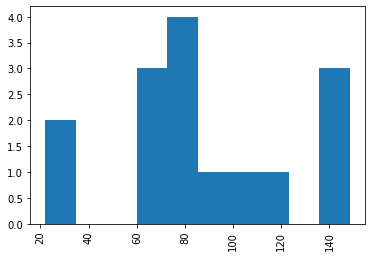

In [37]:

plt.hist(moondists)
plt.xticks(rotation=90)

(array([ 0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

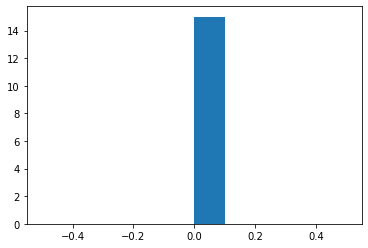

In [38]:
plt.hist(energies)

In [39]:
ev.r_dict['NOTICE_TYPE']

'      AMON ICECUBE HESE '

In [119]:
events[0].r_dict['NOTICE_TYPE']

'      ICECUBE Astrotrack Bronze '